In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv('Iris.csv')
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [118]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [119]:
df.duplicated().sum()

np.int64(0)

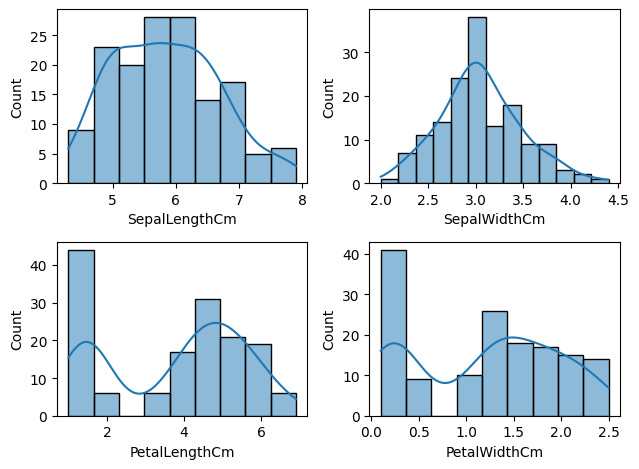

In [120]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('SepalLengthCm',1)
plotting('SepalWidthCm',2)
plotting('PetalLengthCm',3)
plotting('PetalWidthCm',4)


plt.tight_layout()  

In [56]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X=df.drop('Species',axis=1)
y=df['Species']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
model_knn=KNeighborsClassifier(n_neighbors=1)      # n_neighbors=13 gives 100%

In [133]:
model_knn.fit(X_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [134]:
model_knn.score(X_test,y_test)

1.0

In [65]:
from sklearn.svm import SVC

In [66]:
model_svm=SVC(C=30,kernel='rbf',gamma='auto')    #C=10,kernel='linear' gives 100% accuracy

In [67]:
model_svm.fit(X_train,y_train)

,C,30
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [68]:
model_svm.score(X_test,y_test)

1.0

In [69]:
# Now Use the Grid Search CV
from sklearn.model_selection import GridSearchCV

In [70]:
classifier=GridSearchCV((model_svm),{
    'C':[1,10,20,30],
    'kernel':['rbf','linear'],
},cv=5,return_train_score=False)

In [71]:
classifier.fit(X,y)

,estimator,"SVC(C=30, gamma='auto')"
,param_grid,"{'C': [1, 10, ...], 'kernel': ['rbf', 'linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [72]:
classifier.cv_results_

{'mean_fit_time': array([0.05223131, 0.02163324, 0.02583742, 0.01120057, 0.02328868,
        0.01241508, 0.01069198, 0.00473242]),
 'std_fit_time': array([0.03094926, 0.0112312 , 0.00891301, 0.00423876, 0.00724544,
        0.00380609, 0.00086499, 0.00136668]),
 'mean_score_time': array([0.02440238, 0.01621914, 0.01423268, 0.01050315, 0.0174397 ,
        0.00897555, 0.00549951, 0.00398974]),
 'std_score_time': array([0.02386298, 0.01201747, 0.00545827, 0.00180923, 0.00247912,
        0.00727245, 0.0010666 , 0.00106264]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20, 30, 30],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C

In [73]:
results=pd.DataFrame(classifier.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052231,0.030949,0.024402,0.023863,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.466667,0.733333,0.733333,0.733333,0.533333,0.640000,0.116237,5
1,0.021633,0.011231,0.016219,0.012017,1,linear,"{'C': 1, 'kernel': 'linear'}",0.666667,1.000000,1.000000,1.000000,0.700000,0.873333,0.155492,1
2,0.025837,0.008913,0.014233,0.005458,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.466667,0.733333,0.733333,0.733333,0.533333,0.640000,0.116237,5
3,0.011201,0.004239,0.010503,0.001809,10,linear,"{'C': 10, 'kernel': 'linear'}",0.666667,1.000000,1.000000,1.000000,0.700000,0.873333,0.155492,1
4,0.023289,0.007245,0.017440,0.002479,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.466667,0.733333,0.733333,0.733333,0.533333,0.640000,0.116237,5
5,0.012415,0.003806,0.008976,0.007272,20,linear,"{'C': 20, 'kernel': 'linear'}",0.666667,1.000000,1.000000,1.000000,0.700000,0.873333,0.155492,1
6,0.010692,0.000865,0.005500,0.001067,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.466667,0.733333,0.733333,0.733333,0.533333,0.640000,0.116237,5
7,0.004732,0.001367,0.003990,0.001063,30,linear,"{'C': 30, 'kernel': 'linear'}",0.666667,1.000000,1.000000,1.000000,0.700000,0.873333,0.155492,1


In [74]:
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.640000
1,1,linear,0.873333
2,10,rbf,0.640000
3,10,linear,0.873333
4,20,rbf,0.640000
5,20,linear,0.873333
6,30,rbf,0.640000
7,30,linear,0.873333


In [75]:
# Random Search CV
from sklearn.model_selection import RandomizedSearchCV

In [76]:
classifier_r=RandomizedSearchCV((model_svm),{
    'C':[1,10,20,30],
    'kernel':['rbf','linear'],
},n_iter=4,cv=5,return_train_score=False)

In [77]:
classifier_r.fit(X,y)

,estimator,"SVC(C=30, gamma='auto')"
,param_distributions,"{'C': [1, 10, ...], 'kernel': ['rbf', 'linear']}"
,n_iter,4
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [78]:
results=pd.DataFrame(classifier_r.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015870,0.004136,0.009262,0.001438,rbf,30,"{'kernel': 'rbf', 'C': 30}",0.466667,0.733333,0.733333,0.733333,0.533333,0.640000,0.116237,3
1,0.004105,0.000791,0.004173,0.001581,linear,30,"{'kernel': 'linear', 'C': 30}",0.666667,1.000000,1.000000,1.000000,0.700000,0.873333,0.155492,1
2,0.009080,0.001331,0.004188,0.000402,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.466667,0.733333,0.733333,0.733333,0.533333,0.640000,0.116237,3
3,0.007345,0.002124,0.005140,0.001332,linear,10,"{'kernel': 'linear', 'C': 10}",0.666667,1.000000,1.000000,1.000000,0.700000,0.873333,0.155492,1


In [79]:
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,30,rbf,0.640000
1,30,linear,0.873333
2,1,rbf,0.640000
3,10,linear,0.873333


In [80]:
# Ensemble Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [81]:
# Stacking
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:
X=df.drop('Species',axis=1)
y=df['Species']

In [94]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42,stratify=y_encoded)

In [96]:
base_learners=[
    ('dt',DecisionTreeClassifier(random_state=42)),
    ('svc',SVC(probability=True,kernel='rbf',random_state=42)),
    ('lr',LogisticRegression(max_iter=1000))
]

In [97]:
meta_learner=LogisticRegression(max_iter=1000)

In [98]:
stacking_clf=StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

In [99]:
stacking_clf.fit(X_train,y_train)

,estimators,"[('dt', ...), ('svc', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [100]:
y_pred=stacking_clf.predict(X_test)

In [101]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [102]:
# Bagging    (Random Forest Model)
from sklearn.ensemble import RandomForestClassifier

In [103]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
rf_model=RandomForestClassifier(
    n_estimators=100,        #number of Trees
    max_depth=None,          #Let trees grow fully
    random_state=42 
)

In [105]:
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [106]:
y_pred=rf_model.predict(X_test)

In [107]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [108]:
# Boosting
# Ada Boost ,radientBoost,XG Boost
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [109]:
ada_model=AdaBoostClassifier(n_estimators=100,random_state=42)

In [110]:
ada_model.fit(X_train,y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [111]:
y_pred=ada_model.predict(X_test)

In [112]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [113]:
# Gradient Boosting
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
gb_model.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [114]:
y_pred=gb_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [115]:
# XGB 
xgb_model=XGBClassifier(n_estimator=100,learning_rate=0.1,max_depth=3,use_label_encoder=False,eval_metric='mlogloss',random_state=42)

In [116]:
xgb_model.fit(X_train,y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [117]:
y_pred=xgb_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0